In [5]:
'SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec,gaia.dec_error, \
gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error, gaia.radial_velocity, \
gaia.radial_velocity_error, gaia.parallax, gaia.parallax_error, gaia.phot_g_mean_mag, \
gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag \
FROM gaiadr2.gaia_source as gaia \
WHERE gaia.parallax > 5 and \
gaia.pmra_error < .1 and gaia.pmdec_error < .1 and gaia.parallax_error < .1 and gaia.radial_velocity_error < 1 and \
gaia.pmra is not null and gaia.pmdec is not null and \
gaia.phot_bp_mean_mag is not null and gaia.phot_rp_mean_mag is not null and \
gaia.phot_g_mean_mag is not null and gaia.radial_velocity is not null'

# http://docs.astropy.org/en/stable/generated/examples/coordinates/plot_galactocentric-frame. 
# html#sphx-glr-generated-examples-coordinates-plot-galactocentric-frame-py

# https://arxiv.org/pdf/1105.6093.pdf

cols = ['x','y','z','u','v','w']
colz = ['r','theta','z','Vr','Vtheta','Vz']

%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns 
import statistics as stat
import scipy.stats as st
import random as rand
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import astropy.coordinates as coord
import astropy.units as u

# basic functions
def pc_ly(x):
    return (1/(float(x)/1000))*3.26156
def mas_deg(x):
    return x*(1/1000)/3600
def abs_mag(x,y):
    return x - (5 * (np.log10(y/10))) 
def color(x,y):
    return [y[i]-x[i] for i in range(len(x))]
def z_score(x,y,z):
    return (x-y)/z
def rnd(x):
    return round(x,2)
def rnd4(x):
    return round(x,4)
def dist(x):
    return 1/(x/1000)
def V(myarg):
    return (myarg / myarg.unit).value

# transformations / functional data manipulation 
def sixspace(data,_):
    v_sun = coord.CartesianDifferential([0,0,0]*u.km/u.s) # [0,0,0] / [11.1, 12.24, 7.25]
    c = coord.ICRS(ra = data['ra'][_]*u.degree, dec=data['dec'][_]*u.degree,
                distance=(data['parallax'][_]*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=data['pmra'][_]*u.mas/u.yr,
                pm_dec=data['pmdec'][_]*u.mas/u.yr,
                radial_velocity=data['radial_velocity'][_]*u.km/u.s)

    gc_frame = coord.Galactocentric(galcen_distance=8*u.kpc,
                                galcen_v_sun=v_sun,
                                z_sun=0*u.pc)
    gc = c.transform_to(gc_frame)
    return [V(gc.x)+8000, V(gc.y), V(gc.z), V(gc.v_x), V(gc.v_y), V(gc.v_z)]
def threespace(dat,_):
    v_sun = coord.CartesianDifferential([0,0,0]*u.km/u.s) 
    c = coord.ICRS(ra = dat['ra'][_]*u.degree, dec=dat['dec'][_]*u.degree,
                distance=(dat['parallax'][_]*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=dat['pmra'][_]*u.mas/u.yr,
                pm_dec=dat['pmdec'][_]*u.mas/u.yr,
                radial_velocity=0*u.km/u.s)

    gc_frame = coord.Galactocentric(galcen_distance=8*u.kpc,
                                galcen_v_sun=v_sun,
                                z_sun=0*u.pc)
    gc = c.transform_to(gc_frame)
    return [V(gc.x)+8000, V(gc.y), V(gc.z), V(gc.v_x), V(gc.v_y), V(gc.v_z)]

def astroFrame(data):
    lis = []
    for i in range(len(data)):
        lis.append(sixspace(data,i))
    return pd.DataFrame(lis,columns = cols)
def galFrame(data):
    lis = []
    for i in range(len(data)):
        lis.append(galcen(data,i))
    return pd.DataFrame(lis,columns = colz)
def galFrame_norv(dat):
    lis = []
    for i in range(len(dat)):
        lis.append(threespace(dat,i))
    return pd.DataFrame(lis,columns = cols)
def galcen(data,_):
    c = coord.ICRS(ra = data['ra'][_]*u.degree, dec=data['dec'][_]*u.degree,
                distance=(data['parallax'][_]*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=data['pmra'][_]*u.mas/u.yr,
                pm_dec=data['pmdec'][_]*u.mas/u.yr,
                radial_velocity=data['radial_velocity'][_]*u.km/u.s)
    gc = c.transform_to(coord.Galactocentric)
    return [V(gc.x), V(gc.y), V(gc.z), V(gc.v_x), V(gc.v_y), V(gc.v_z)]

In [6]:
hya1 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/TidalTails/Hyades/core_wrv.csv')
hya2 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/TidalTails/Hyades/core_worv.csv')

core1,core2 = astroFrame(hya1), astroFrame(hya2)
core1['space_v'] = [np.sqrt(core1['u'][i]**2+core1['v'][i]**2+core1['w'][i]**2) for i in range(len(core1))]
core2['space_v'] = [np.sqrt(core2['u'][i]**2+core2['v'][i]**2+core2['w'][i]**2) for i in range(len(core2))]

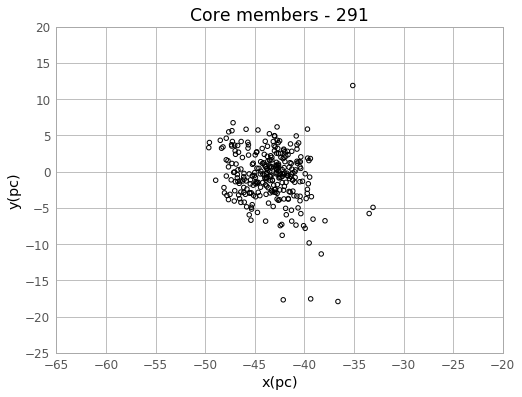


R(Center) = (x,y,z) = (-43.43,-0.51,-16.74) pc
V(Center) = (u,v,w) = (-40.71,-19.19,-0.83) km*s^-1

Core member V: 46.55 km*s^-1


x          y          z          u          v         w    space_v
0 -42.126156 -17.689284 -23.025715 -47.543608 -20.106127 -0.421777  51.621981
1 -47.872135   1.628097 -17.883689 -37.783325 -22.102670  0.464486  43.775832
2 -47.619223   5.481615 -17.698129 -42.582871 -19.215245 -1.439723  46.739698
3 -47.296445   1.125709 -19.155405 -41.603070 -19.442094 -1.107857  45.935148
4 -48.936410  -1.192041 -13.687497 -42.194376 -19.223483 -1.303955  46.385428

In [7]:
plt.scatter(core1['x'],core1['y'],s=20,edgecolors = 'k',facecolors='none')
plt.scatter(core2['x'],core2['y'],s=20,edgecolors = 'k',facecolors='none')
plt.xlim([-65,-20])
plt.ylim([-25,20])
plt.xlabel('x(pc)')
plt.ylabel('y(pc)')
plt.title('Core members - {}'.format(len(core1)+len(core2)))
plt.show()

print('\nR(Center) = (x,y,z) = ({},{},{}) pc\nV(Center) = (u,v,w) = ({},{},{}) km*s^-1'\
      .format(rnd(np.mean(pd.concat([core1['x'],core2['x']]))),rnd(np.mean(pd.concat([core1['y'],core2['y']]))),\
              rnd(np.mean(pd.concat([core1['z'],core2['z']]))),rnd(np.mean(pd.concat([core1['u'],core2['u']]))),\
              rnd(np.mean(pd.concat([core1['v'],core2['v']]))),rnd(np.mean(pd.concat([core1['w'],core2['w']])))))
core_mean_v_mag = np.sqrt((43.43**2)+(0.51**2)+(16.74**2))
print('\nCore member V: {} km*s^-1'.format(rnd(core_mean_v_mag)))
core1.head()

In [8]:
data = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/TidalTails/Hyades/5pc.csv')

pm_scalar = []
for i in range(len(data['pmra'])):
    pm_scalar.append(np.sqrt((data['pmra'][i]/1000)**2+(data['pmdec'][i]/1000)**2))
    
data['pm_scalar'] = pm_scalar
data['dist'] = 1/(data['parallax']/1000)
tang_V = [pm_scalar[i]*data['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 
data['tang_v'] = tang_V

HELIO = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/TidalTails/Hyades/HELIO.csv')
HELIO['id'] = [i for i in range(len(HELIO))]

HELIO['u'] = HELIO['u'] - 11.1
HELIO['v'] = HELIO['v'] - 12.24
HELIO['w'] = HELIO['w'] -7.25

data.head()

source_id          ra  ra_error        dec  dec_error       pmra  \
0  5781834812959489920  236.645693  0.018643 -75.399888   0.019501   9.236133   
1  4464022263949414656  245.356079  0.023258  14.620676   0.020737 -54.763548   
2  4464036484584088320  245.225769  0.021291  14.721420   0.017986 -28.392495   
3  4464239692374461824  243.873518  0.028097  13.837664   0.024657  12.851653   
4  4464037004277180800  245.296127  0.022200  14.720871   0.021614 -45.613007   

   pmra_error      pmdec  pmdec_error  radial_velocity  radial_velocity_error  \
0    0.032575 -13.196771     0.041458         0.242497               0.957960   
1    0.041962 -32.305415     0.038548       -12.975678               0.320910   
2    0.040309  -6.300816     0.034020       -10.722656               0.928010   
3    0.057041 -15.392789     0.046000       -10.016315               0.527596   
4    0.039445  18.133144     0.039671       -16.469912               0.469753   

   parallax  parallax_error  phot_g_mean_mag  phot_bp_mean_mag  \
0  7.674512        0.023794        10.113231         10.429392   
1  6.365233        0.036161        10.194319         10.528229   
2  7.368490        0.033168        11.904952         12.428617   
3  5.309226        0.043505        10.264918         10.536487   
4  6.977435        0.036833        11.561617         12.022272   

   phot_rp_mean_mag  pm_scalar        dist     tang_v  
0          9.665930   0.016108  130.301442   9.948636  
1          9.729285   0.063582  157.103438  47.347716  
2         11.251430   0.029083  135.713018  18.708649  
3          9.864599   0.020053  188.351355  17.902584  
4         10.968613   0.049085  143.319151  33.345188

In [9]:
FILT = []

u = np.mean(pd.concat([core1['u'],core2['u']]))
v = np.mean(pd.concat([core1['v'],core2['v']]))
w = np.mean(pd.concat([core1['w'],core2['w']]))

print(u,v,w)

for i in range(len(HELIO)):
    if HELIO['u'][i] >=  -42.24-3 and HELIO['u'][i] <= -42.24+3 and\
    HELIO['v'][i] >= -19-3 and HELIO['v'][i] <= -19+3 and\
    HELIO['w'][i] >= -1.48-3 and HELIO['w'][i] <= -1.48+3:
        FILT.append(list(HELIO.loc[i]))
        
FILT = pd.DataFrame(FILT,columns = list(HELIO)) 

FILT.head()

-40.71324061426742 -19.192330532154305 -0.8293379138758141


x           y           z          u          v         w      id
0  83.361720  -88.147999  -34.360464 -39.606200 -17.101114  1.156748    14.0
1  71.165014  -92.062374   16.292430 -42.103594 -18.618511 -2.057992   252.0
2 -54.053349  -47.443063 -103.202561 -42.272908 -21.271482 -0.981441  1515.0
3 -15.766551 -133.876230   27.647501 -39.270992 -17.426068 -0.601941  1761.0
4  16.787986   42.059299 -188.641781 -41.592364 -19.255652  0.297610  1777.0

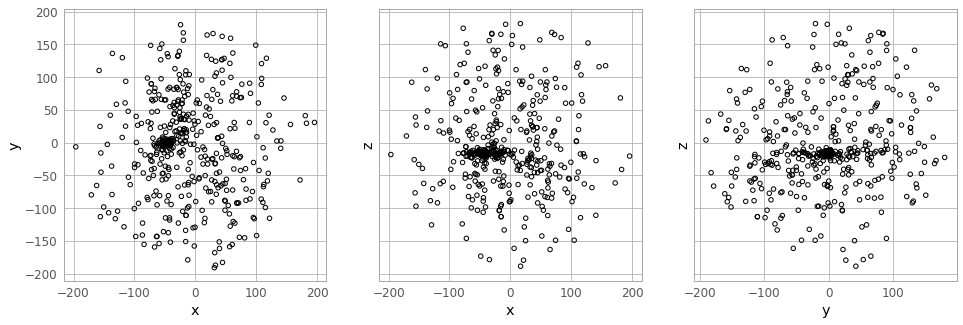

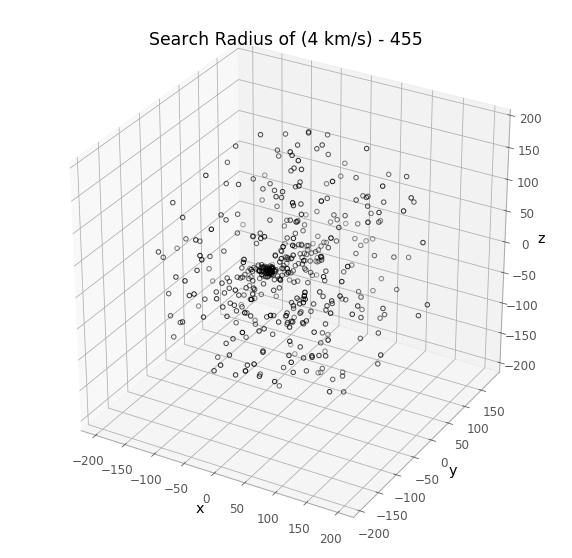

In [10]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize = (16,5))
ax1.scatter(FILT['x'],FILT['y'],s=20,edgecolors = 'k',facecolors='none')
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax2.scatter(FILT['x'],FILT['z'],s=20,edgecolors = 'k',facecolors='none')
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax3.scatter(FILT['y'],FILT['z'],s=20,edgecolors = 'k',facecolors='none')
ax3.set_xlabel('y'), ax3.set_ylabel('z')
plt.show()

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Search Radius of (4 km/s) - {}'.format(len(FILT)))

ax.scatter3D(FILT['x'], FILT['y'], FILT['z'],s=20,edgecolors = 'k',facecolors='none')
plt.show()

In [11]:
# Spatial Density Filter

stars = []
raw = []

def spherical(x,y,z):
    rho = np.sqrt(x**2+y**2+z**2)
    phi = np.arccos(z/rho)
    theta = np.arctan(y/x)
    lis = [rho,abs(theta),abs(phi)]
    return lis

for o in range(len(FILT)):
    
    count = 0

    x,y,z = FILT['x'][o],FILT['y'][o],FILT['z'][o]
    
    if x - x == 0: dx = -x
    else: dx = x
    if y - y == 0: dy = -y
    else: dy = x
    if z - z == 0: dz = -z
    else: dz = z
    
    for i in range(len(FILT)):
        coords = spherical(FILT['x'][i] + dx, FILT['y'][i] + dy, FILT['z'][i] + dz)
        if coords[0] < 20:
            count += 1
            
    if count > 4: 
        stars.append(list(FILT.loc[o]))
        raw.append(list(data.loc[FILT['id'][o]]))
               
stars = pd.DataFrame(stars,columns = list(FILT))   
raw = pd.DataFrame(raw,columns = list(data))

/Users/landonbuechner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/landonbuechner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


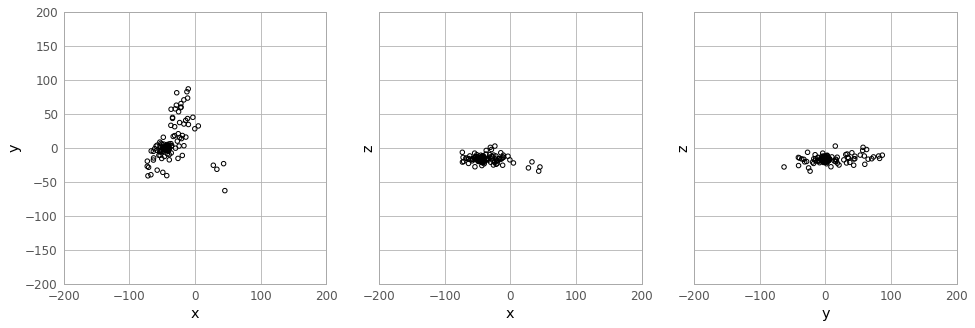

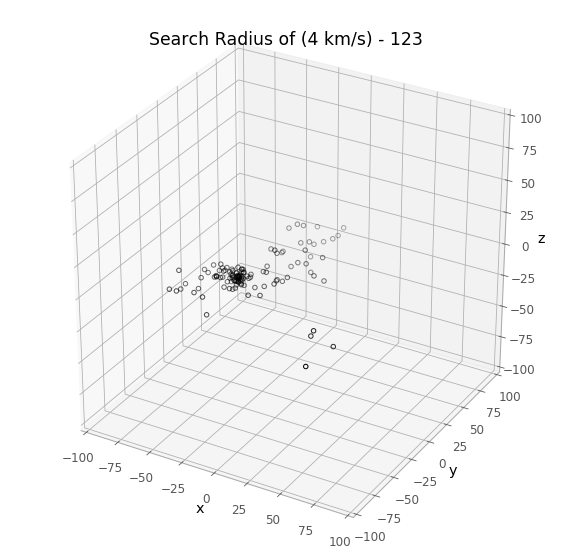

In [12]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize = (16,5))

ax1.scatter(stars['x'],stars['y'],s=20,edgecolors = 'k',facecolors='none')
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])

ax2.scatter(stars['x'],stars['z'],s=20,edgecolors = 'k',facecolors='none')
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

ax3.scatter(stars['y'],stars['z'],s=20,edgecolors = 'k',facecolors='none')
ax3.set_xlabel('y'), ax3.set_ylabel('z')
ax3.set_xlim([-200,200])
ax3.set_ylim([-200,200])

plt.show()

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-100,100])
ax.set_ylim([-100,100])
ax.set_zlim([-100,100])
ax.set_title('Search Radius of (4 km/s) - {}'.format(len(stars)))

ax.scatter3D(stars['x'], stars['y'], stars['z'],s=20,edgecolors = 'k',facecolors='none')
plt.show()

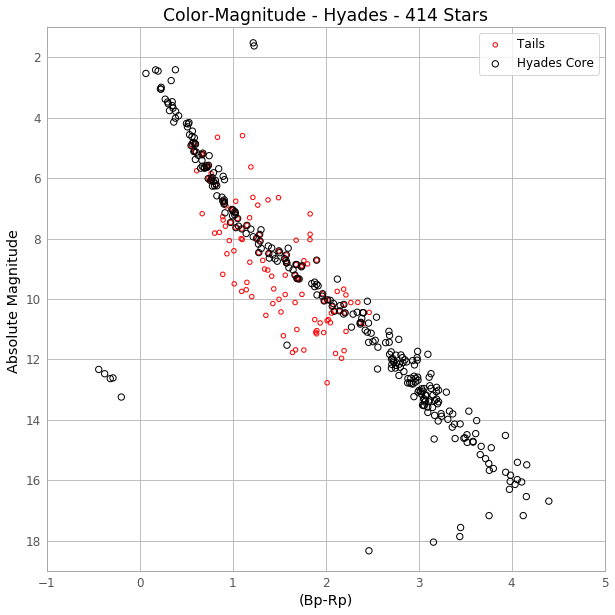

In [13]:
plt.figure(figsize=(10,10))
plt.title('Color-Magnitude - Hyades - {} Stars'.format(len(raw)+len(hya1)+len(hya2)))
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([-1,5])
plt.ylim([19,1])

M_g = [abs_mag(raw['phot_g_mean_mag'][i],raw['parallax'][i]) for i in range(len(raw['ra']))]
M_rp = [abs_mag(raw['phot_rp_mean_mag'][i],raw['parallax'][i]) for i in range(len(raw['ra']))]
M_b = [abs_mag(raw['phot_bp_mean_mag'][i],raw['parallax'][i]) for i in range(len(raw['ra']))]
CI = color(M_rp,M_b)
plt.scatter(CI, M_g,marker='o',s=20,edgecolors = 'r',facecolors='none')


M_g = [abs_mag(hya1['phot_g_mean_mag'][i],hya1['parallax'][i]) for i in range(len(hya1['ra']))]
M_rp = [abs_mag(hya1['phot_rp_mean_mag'][i],hya1['parallax'][i]) for i in range(len(hya1['ra']))]
M_b = [abs_mag(hya1['phot_bp_mean_mag'][i],hya1['parallax'][i]) for i in range(len(hya1['ra']))]
CI = color(M_rp,M_b)
plt.scatter(CI, M_g,marker='o',s=40,edgecolors = 'k',facecolors='none')


M_g = [abs_mag(hya2['phot_g_mean_mag'][i],hya2['parallax'][i]) for i in range(len(hya2['ra']))]
M_rp = [abs_mag(hya2['phot_rp_mean_mag'][i],hya2['parallax'][i]) for i in range(len(hya2['ra']))]
M_b = [abs_mag(hya2['phot_bp_mean_mag'][i],hya2['parallax'][i]) for i in range(len(hya2['ra']))]
CI = color(M_rp,M_b)
plt.scatter(CI, M_g,marker='o',s=40,edgecolors = 'k',facecolors='none')
plt.legend(['Tails','Hyades Core'])
plt.show()

  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_interppotential_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_integrate_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_integrate_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_actionAngle_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_actionAngle_c.cpython-36m-darwin.so
  Reason: image not found' 


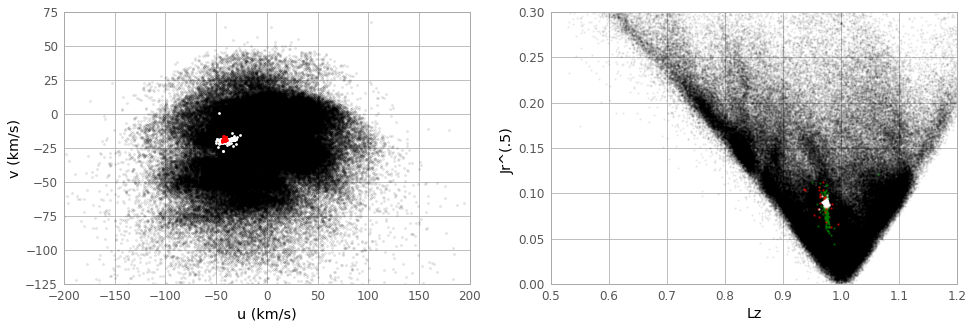

In [14]:
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckel

aAS= actionAngleStaeckel(pot=MWPotential2014,delta=0.4,c=False) 

def stae(df):
    lis = []
    for i in range(len(df)):
        op= Orbit(vxvv=[df['ra'][i],df['dec'][i],1/(df['parallax'][i]/1000)/1000,\
               df['pmra'][i],df['pmdec'][i],df['radial_velocity'][i]],radec=True)
        lis.append(aAS(op))
    return lis
        
#staeckel = pd.DataFrame(stae(data),columns = ['Jr','Lz','Jz'])
#staeckel.to_csv('staeckel_data.csv', encoding='utf-8', index=False)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,5))

ax1.scatter(HELIO['u'],HELIO['v'],s=4,alpha = 0.075,c = 'k')
ax1.scatter(core1['u'],core1['v'],s = 3, c = 'w')
ax1.scatter(core2['u'],core2['v'],s = 3, c = 'w')
ax1.scatter(stars['u'],stars['v'],s = 3, c = 'r')
ax1.set_xlabel('u (km/s)')
ax1.set_ylabel('v (km/s)')
ax1.set_xlim([-200,200])
ax1.set_ylim([-125,75])

staeckel = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/TidalTails/Hyades/staeckel_data.csv')
tail_stae = pd.DataFrame(stae(raw),columns = ['Jr','Lz','Jz'])
coreA =  pd.DataFrame(stae(hya1),columns = ['Jr','Lz','Jz'])
coreB =  pd.DataFrame(stae(hya2),columns = ['Jr','Lz','Jz'])

ax2.scatter(staeckel['Lz'],(staeckel['Jr'])**.5,s=2,alpha = 0.05,c = 'k') #.01

ax2.scatter(coreB['Lz'],(coreB['Jr'])**.5,s=2,c= 'g',alpha = 0.5)

ax2.scatter(coreA['Lz'],(coreA['Jr'])**.5,s=2,c= 'r',alpha = 0.5)
ax2.scatter(tail_stae['Lz'],(tail_stae['Jr'])**.5,s=2,c= 'w',alpha = 0.5)
ax2.set_xlabel('Lz')
ax2.set_ylabel('Jr^(.5) ')
ax2.set_xlim([0.5,1.2])
ax2.set_ylim([0,.3])
plt.show()

In [15]:
revEQ = []
revGAL = []
test = []
maxy = max(tail_stae['Jr']**.5)
miny = min(tail_stae['Jr']**.5)

maxx = max(tail_stae['Lz'])
minx = min(tail_stae['Lz'])

for i in range(len(staeckel)):
    if staeckel['Lz'][i] <= maxx and staeckel['Lz'][i] >= minx and\
    staeckel['Jr'][i]**.5 <= .11 and staeckel['Jr'][i]**.5 >= .08:
        revEQ.append(list(data.loc[i]))
        revGAL.append(list(HELIO.loc[i]))
       
revEQ = pd.DataFrame(revEQ, columns = list(data))
revGAL = pd.DataFrame(revGAL, columns = list(HELIO))

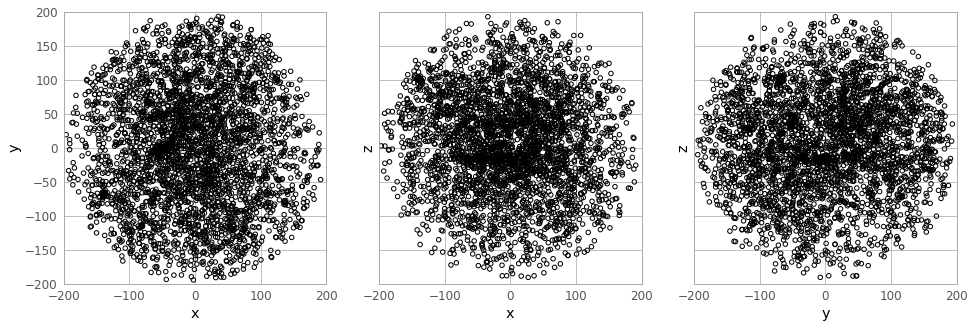

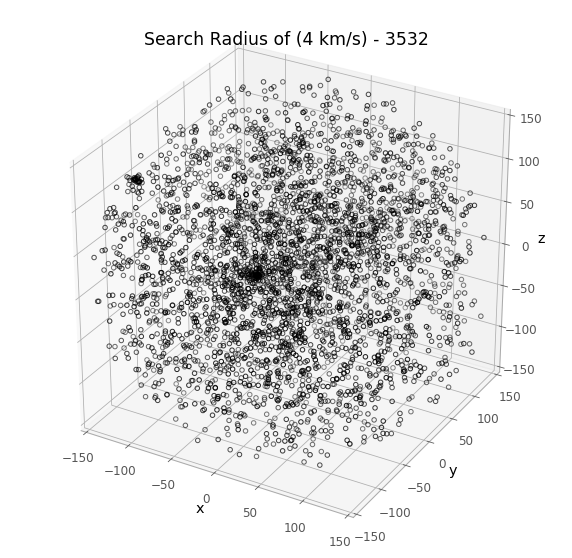

In [16]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize = (16,5))

ax1.scatter(revGAL['x'],revGAL['y'],s=20,edgecolors = 'k',facecolors='none')
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])

ax2.scatter(revGAL['x'],revGAL['z'],s=20,edgecolors = 'k',facecolors='none')
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

ax3.scatter(revGAL['y'],revGAL['z'],s=20,edgecolors = 'k',facecolors='none')
ax3.set_xlabel('y'), ax3.set_ylabel('z')
ax3.set_xlim([-200,200])
ax3.set_ylim([-200,200])

plt.show()

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-150,150])
ax.set_ylim([-150,150])
ax.set_zlim([-150,150])
ax.set_title('Search Radius of (4 km/s) - {}'.format(len(revEQ)))

ax.scatter3D(revGAL['x'], revGAL['y'], revGAL['z'],s=20,edgecolors = 'k',facecolors='none')
plt.show()

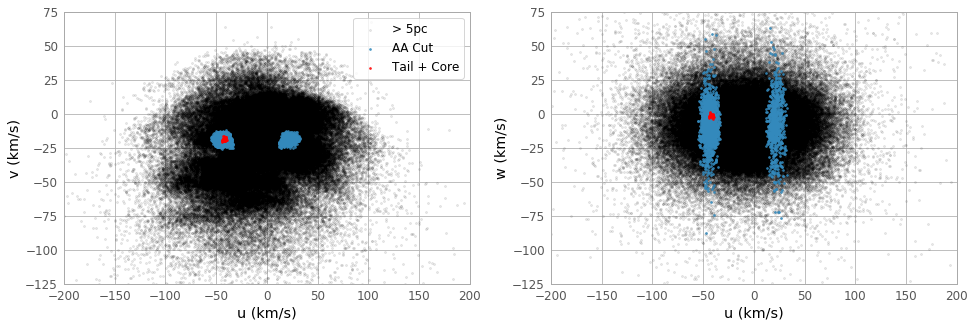

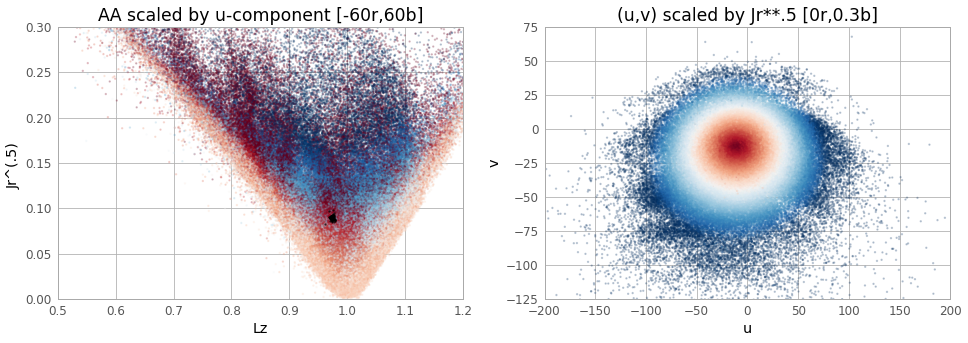

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,5))

ax1.scatter(HELIO['u'],HELIO['v'],s=4,alpha = 0.075,c = 'k')
ax1.scatter(revGAL['u'],revGAL['v'],s = 3,alpha = .75)
ax1.scatter(stars['u'],stars['v'],s = 3, c = 'r',alpha = .75)

ax1.set_xlabel('u (km/s)')
ax1.set_ylabel('v (km/s)')
ax1.set_xlim([-200,200])
ax1.set_ylim([-125,75])
ax1.legend(['> 5pc','AA Cut','Tail + Core'],loc = 'upper right')

ax2.scatter(HELIO['u'],HELIO['w'],s=4,alpha = 0.075,c = 'k')
ax2.scatter(revGAL['u'],revGAL['w'],s = 3,alpha = .75)
ax2.scatter(stars['u'],stars['w'],s = 3, c = 'r',alpha = .75)

ax2.set_xlabel('u (km/s)')
ax2.set_ylabel('w (km/s)')
ax2.set_xlim([-200,200])
ax2.set_ylim([-125,75])
plt.show()


f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,5))

u = HELIO['u']
norm = plt.Normalize(vmin=-50, vmax=50)
ax1.scatter(staeckel['Lz'],(staeckel['Jr'])**.5,s=2,alpha = 0.2,c=u,norm=norm,cmap = 'RdBu')
#ax1.colorbar()
ax1.scatter(tail_stae['Lz'],(tail_stae['Jr'])**.5,s=2,c='k',alpha = 0.5)
ax1.set_xlabel('Lz')
ax1.set_ylabel('Jr^(.5) ')
ax1.set_xlim([0.5,1.2])
ax1.set_ylim([0,.3])
ax1.set_title('AA scaled by u-component [-60r,60b]')

u = staeckel['Jr']**.5
norm = plt.Normalize(vmin=0, vmax=.25)
ax2.scatter(HELIO['u'],HELIO['v'],s=2,alpha = 0.2,c=u,norm=norm,cmap = 'RdBu')
ax2.set_title('(u,v) scaled by Jr**.5 [0r,0.3b]')
#ax2.colorbar()
ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.set_xlim([-200,200])
ax2.set_ylim([-125,75])
plt.show()

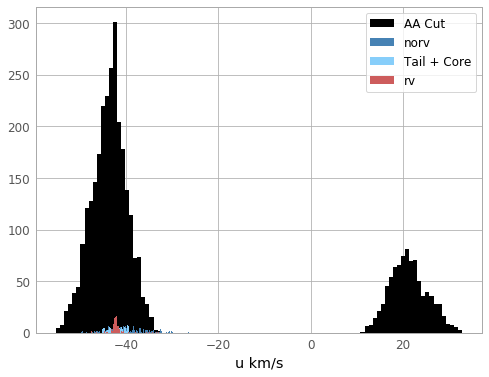

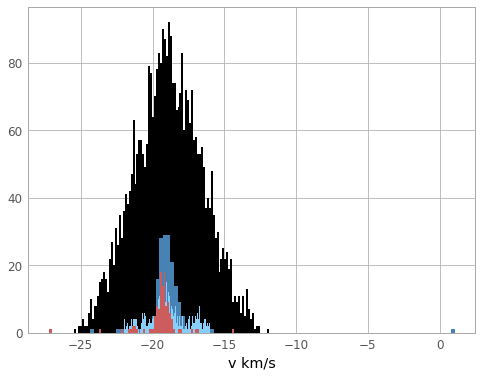

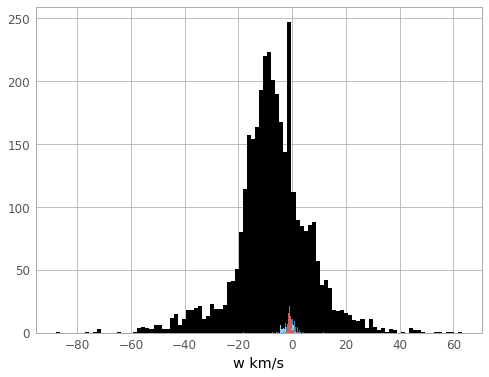

In [18]:
plt.hist(revGAL['u'],bins=100,color = 'k')
plt.hist(core2['u'],color ='#4682b4',bins =100)
plt.hist(FILT['u'],bins=100,color='#87cefa')
plt.hist(core1['u'],color = '#cd5c5c',bins = 100)
plt.xlabel('u km/s')
plt.legend(['AA Cut','norv','Tail + Core','rv'],loc = 'upper right')
plt.show()

plt.hist(revGAL['v'],bins=100,color = 'k')
plt.hist(core2['v'],color ='#4682b4',bins =100)
plt.hist(FILT['v'],bins=100,color='#87cefa')
plt.hist(core1['v'],color = '#cd5c5c',bins = 100)
plt.xlabel('v km/s')
plt.show()

plt.hist(revGAL['w'],bins=100,color = 'k')
plt.hist(core2['w'],color ='#4682b4',bins =100)
plt.hist(FILT['w'],bins=100,color='#87cefa')
plt.hist(core1['w'],color = '#cd5c5c',bins =100)
plt.xlabel('w km/s')
plt.show()

In [19]:
testGAL = []
testRAW = []

postestGAL = []
postestRAW = []

for i in range(len(revGAL)):
    if revGAL['u'][i] > -60 and revGAL['u'][i] < -36:
        testGAL.append(list(revGAL.loc[i]))
        testRAW.append(list(revEQ.loc[i]))
    else:
        postestGAL.append(list(revGAL.loc[i]))
        postestRAW.append(list(revEQ.loc[i]))
        
        
testGAL = pd.DataFrame(testGAL, columns = list(revGAL))
testRAW = pd.DataFrame(testRAW, columns = list(revEQ))

postestGAL = pd.DataFrame(postestGAL, columns = list(revGAL))
postestRAW = pd.DataFrame(postestRAW, columns = list(revEQ))

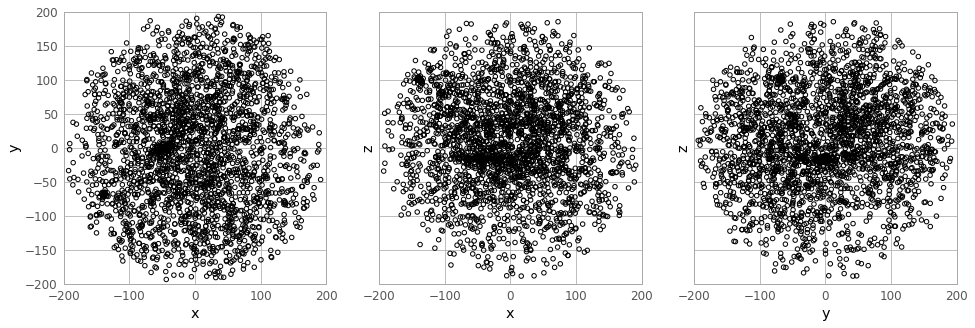

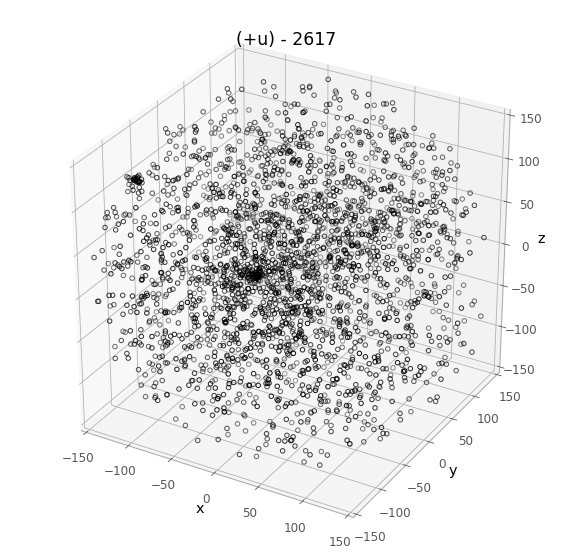

In [20]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize = (16,5))

ax1.scatter(testGAL['x'],testGAL['y'],s=20,edgecolors = 'k',facecolors='none')
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])

ax2.scatter(testGAL['x'],testGAL['z'],s=20,edgecolors = 'k',facecolors='none')
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

ax3.scatter(testGAL['y'],testGAL['z'],s=20,edgecolors = 'k',facecolors='none')
ax3.set_xlabel('y'), ax3.set_ylabel('z')
ax3.set_xlim([-200,200])
ax3.set_ylim([-200,200])

plt.show()

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-150,150])
ax.set_ylim([-150,150])
ax.set_zlim([-150,150])
ax.set_title('(+u) - {}'.format(len(testGAL)))

ax.scatter3D(testGAL['x'], testGAL['y'], testGAL['z'],s=20,edgecolors = 'k',facecolors='none')
plt.show()

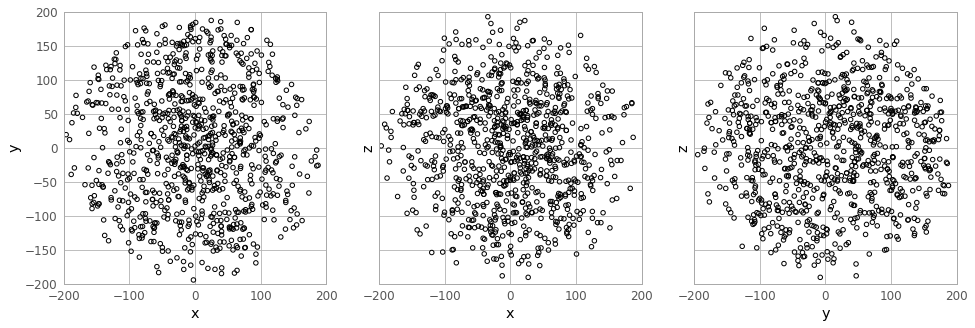

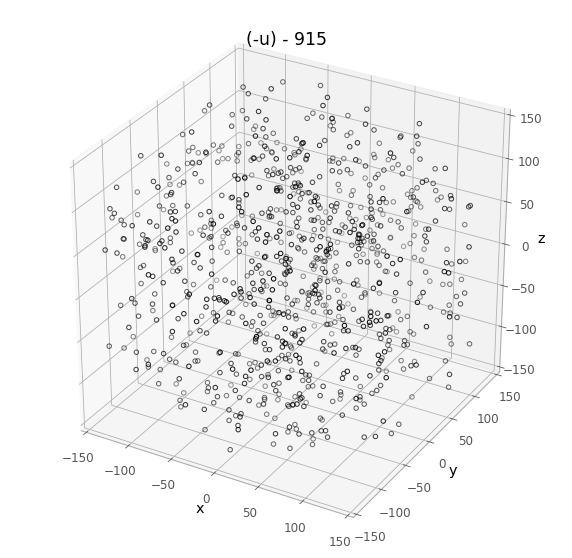

In [21]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize = (16,5))

ax1.scatter(postestGAL['x'],postestGAL['y'],s=20,edgecolors = 'k',facecolors='none')
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])

ax2.scatter(postestGAL['x'],postestGAL['z'],s=20,edgecolors = 'k',facecolors='none')
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

ax3.scatter(postestGAL['y'],postestGAL['z'],s=20,edgecolors = 'k',facecolors='none')
ax3.set_xlabel('y'), ax3.set_ylabel('z')
ax3.set_xlim([-200,200])
ax3.set_ylim([-200,200])
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-150,150])
ax.set_ylim([-150,150])
ax.set_zlim([-150,150])
ax.set_title('(-u) - {}'.format(len(postestGAL)))

ax.scatter3D(postestGAL['x'], postestGAL['y'], postestGAL['z'],s=20,edgecolors = 'k',facecolors='none')
plt.show()

In [22]:
# Spatial Density Filter

starz = []
rawz = []

def spherical(x,y,z):
    rho = np.sqrt(x**2+y**2+z**2)
    phi = np.arccos(z/rho)
    theta = np.arctan(y/x)
    lis = [rho,abs(theta),abs(phi)]
    return lis

for o in range(len(testGAL)):
    
    count = 0

    x,y,z = testGAL['x'][o],testGAL['y'][o],testGAL['z'][o]
    
    if x - x == 0: dx = -x
    else: dx = x
    if y - y == 0: dy = -y
    else: dy = x
    if z - z == 0: dz = -z
    else: dz = z
    
    for i in range(len(testGAL)):
        coords = spherical(testGAL['x'][i] + dx, testGAL['y'][i] + dy, testGAL['z'][i] + dz)
        if coords[0] < 15: # 15 
            count += 1
            
    if count > 4: # 5 
        starz.append(list(testGAL.loc[o]))
        rawz.append(list(testRAW.loc[o]))
               
starz = pd.DataFrame(starz,columns = list(testGAL))   
rawz = pd.DataFrame(rawz,columns = list(testRAW))

/Users/landonbuechner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  

/Users/landonbuechner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':



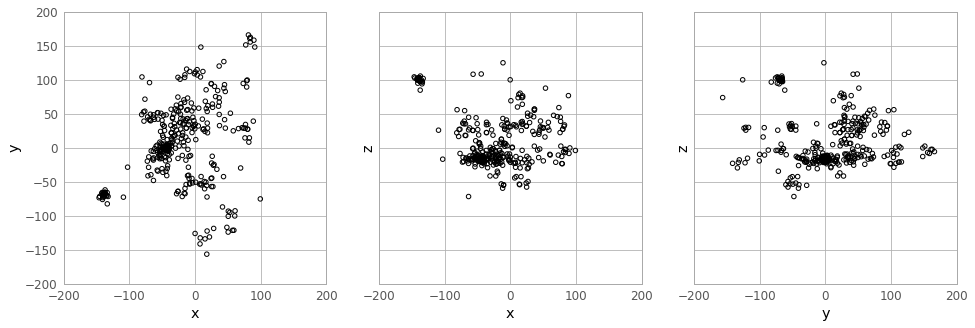

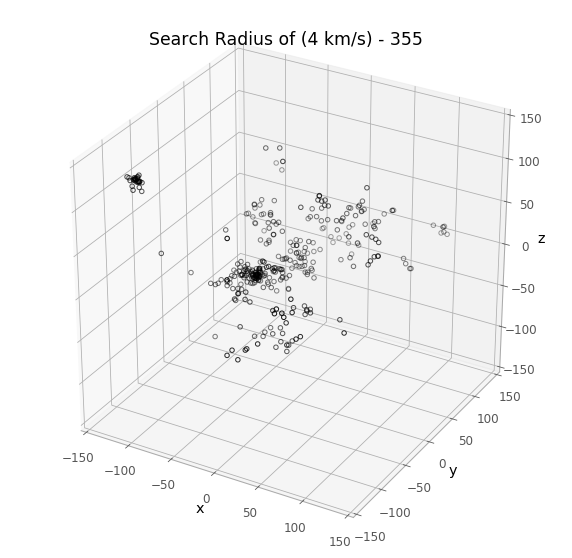

In [23]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize = (16,5))

ax1.scatter(starz['x'],starz['y'],s=20,edgecolors = 'k',facecolors='none')
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])

ax2.scatter(starz['x'],starz['z'],s=20,edgecolors = 'k',facecolors='none')
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

ax3.scatter(starz['y'],starz['z'],s=20,edgecolors = 'k',facecolors='none')
ax3.set_xlabel('y'), ax3.set_ylabel('z')
ax3.set_xlim([-200,200])
ax3.set_ylim([-200,200])

plt.show()

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-150,150])
ax.set_ylim([-150,150])
ax.set_zlim([-150,150])
ax.set_title('Search Radius of (4 km/s) - {}'.format(len(starz)))

ax.scatter3D(starz['x'], starz['y'], starz['z'],s=20,edgecolors = 'k',facecolors='none')
plt.show()